In [155]:
import numpy as np
# Generate random data
rng = np.random.RandomState(42)
X = rng.randn(100, 20)
n_components = 2

In [167]:
# Fit PCA
pca = PCA(n_components=1)
pca_transformed = pca.fit_transform(X)

# Fit ACPCA with L=0.0
acpca = ACPCA(n_components=1, Y=np.zeros((X.shape[0], )), L=0, preprocess=True, use_implicit=False, scale_x=False, scale_y=False, center_x=True, center_y=True)
acpca_transformed = acpca.fit_transform(X)

# Compare the results
np.concatenate([pca_transformed, acpca_transformed], axis=1)

array([[-1.93545846e+00, -1.93545762e+00],
       [ 1.50786896e+00,  1.50787067e+00],
       [-8.60459287e-01, -8.60459305e-01],
       [-1.24638102e+00, -1.24638085e+00],
       [ 6.72487945e-01,  6.72488617e-01],
       [-9.65871023e-01, -9.65871954e-01],
       [-7.72989621e-02, -7.72995790e-02],
       [ 1.03085401e+00,  1.03085407e+00],
       [-1.17991273e+00, -1.17991385e+00],
       [-9.19182835e-01, -9.19182007e-01],
       [ 9.79635437e-01,  9.79635531e-01],
       [ 9.55362967e-01,  9.55363712e-01],
       [ 7.41721197e-01,  7.41720478e-01],
       [-2.38013406e+00, -2.38013365e+00],
       [ 8.53898461e-01,  8.53897849e-01],
       [ 8.92375489e-01,  8.92375269e-01],
       [-1.26369074e+00, -1.26369046e+00],
       [ 1.51336009e+00,  1.51336084e+00],
       [ 8.98775166e-01,  8.98775079e-01],
       [-8.39102479e-01, -8.39102513e-01],
       [ 3.68607450e-01,  3.68606512e-01],
       [-1.32066474e+00, -1.32066504e+00],
       [-7.07372309e-01, -7.07371132e-01],
       [-9.

In [157]:
pca_transformed

array([[-1.93545846e+00,  9.57202333e-01],
       [ 1.50786896e+00,  2.67276800e+00],
       [-8.60459287e-01,  2.22966153e-01],
       [-1.24638102e+00,  1.20587079e+00],
       [ 6.72487945e-01,  7.15274268e-01],
       [-9.65871023e-01, -1.43000780e+00],
       [-7.72989621e-02, -5.78334402e-01],
       [ 1.03085401e+00,  4.08256608e-01],
       [-1.17991273e+00, -2.05033170e+00],
       [-9.19182835e-01,  1.89163391e+00],
       [ 9.79635437e-01, -6.14239466e-01],
       [ 9.55362967e-01,  7.48636757e-01],
       [ 7.41721197e-01, -8.24341080e-01],
       [-2.38013406e+00,  9.92670227e-01],
       [ 8.53898461e-01, -9.80225278e-01],
       [ 8.92375489e-01, -2.38847622e-01],
       [-1.26369074e+00,  1.97254603e-01],
       [ 1.51336009e+00,  1.67310998e+00],
       [ 8.98775166e-01,  5.57185795e-01],
       [-8.39102479e-01,  2.12513239e-01],
       [ 3.68607450e-01, -1.68380952e+00],
       [-1.32066474e+00, -6.80358650e-02],
       [-7.07372309e-01,  2.41615791e+00],
       [-9.

In [202]:
# Load rda dataset into pandas
import pandas as pd
import rdata
import numpy as np

# Load the .rda file
parsed_data = rdata.parser.parse_file("../data/data_example1.rda")

# Convert the R objects to a pandas DataFrame
converted_data = rdata.conversion.convert(parsed_data)

# load to pandas if 'data_example1' , X, Y
data = pd.DataFrame(converted_data['data_example1']['X'])
data.columns= [f'gene_{i}' for i in range(data.shape[1])]
Y = converted_data['data_example1']['Y']
data['batch_labels'] = np.argmax(Y, axis=1)
data['point_annotation'] = converted_data['data_example1']['lab']
data.to_csv('../data/data_example1.csv', index=False)


In [62]:
# Load the .rda file
parsed_data = rdata.parser.parse_file("../data/data_fly_worm.rda")

# Convert the R objects to a pandas DataFrame
converted_data = rdata.conversion.convert(parsed_data)

# load to pandas if 'data_example1' , X, Y
data_1 = pd.DataFrame(converted_data['data_fly_worm']['data_fly'])
data_2 = pd.DataFrame(converted_data['data_fly_worm']['data_worm'])
data_1.columns= converted_data['data_fly_worm']['fly_gene']

data_merged = pd.DataFrame(converted_data['data_fly_worm']['X'])
data_merged['species'] = converted_data['data_fly_worm']['X_species']
data_merged['time'] = converted_data['data_fly_worm']['X_time']
data_merged['Y'] = np.argmax(converted_data['data_fly_worm']['Y'].values, axis=1)
#data_2.columns= converted_data['data_fly_worm']['worm_gene']
#data_2.columns= [f'gene_{i}' for i in range(data_2.shape[1])]

data_merged.to_csv('../data/data_fly_worm_merged.csv', index=False)
#Y1 = pd.DataFrame(converted_data['data_fly_worm']['Y'])

# batch_labels = np.argmax(Y, axis=1)
# data['batch_labels'] = batch_labels
# data.to_csv('../data/data_fly_worm.csv', index=False)

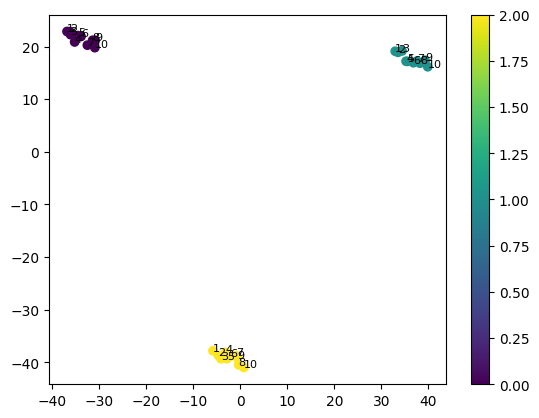

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../data/data_example1.csv')

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = data.iloc[:, :-2].values
y = data['batch_labels'].values
X_pca_i = pca.fit_transform(X)

plt.scatter(X_pca_i[:, 0], X_pca_i[:, 1], c=y, cmap='viridis')
# annotate each point with time
for i, txt in enumerate(data['point_annotation']):
    plt.annotate(txt, (X_pca_i[i, 0], X_pca_i[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

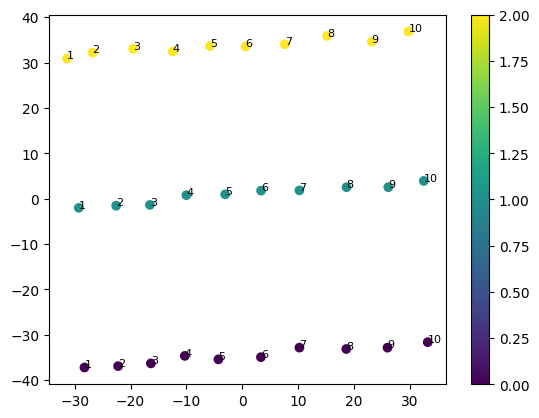

In [74]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('/home/vlad/projects/acpca')
from acpca.transform import ACPCA

data = pd.read_csv('../data/data_example1.csv')

X = data.iloc[:, :-2].values
y = data['batch_labels'].values

acpca = ACPCA(n_components=2, Y=y, L=-1, use_implicit=True, preprocess=True, scale_x=False, center_x=True, center_y=True)

X_pca = acpca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# annotate each point with time
for i, txt in enumerate(data['point_annotation']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

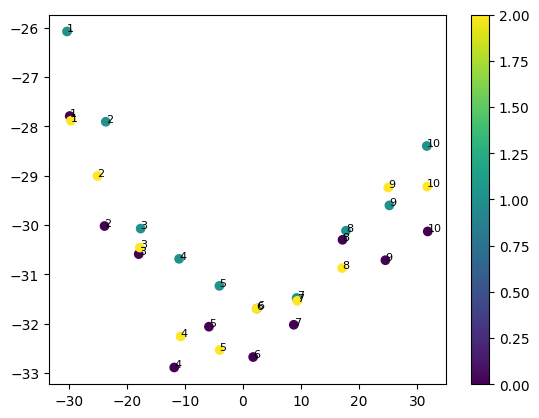

In [80]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('/home/vlad/projects/acpca')
from acpca.transform import ACPCA

data = pd.read_csv('../data/data_example1.csv')

X = data.iloc[:, :-2].values
y = data['batch_labels'].values

acpca = ACPCA(n_components=2, Y=y, L=-1, use_implicit=True, lambda_method='silhouette', kernel='linear', gamma=0.5, preprocess=False, scale_x=True, center_x=True, center_y=True)

X_pca = acpca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# annotate each point with time
for i, txt in enumerate(data['point_annotation']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

<module 'matplotlib.pyplot' from '/home/vlad/anaconda3/envs/acpca/lib/python3.13/site-packages/matplotlib/pyplot.py'>

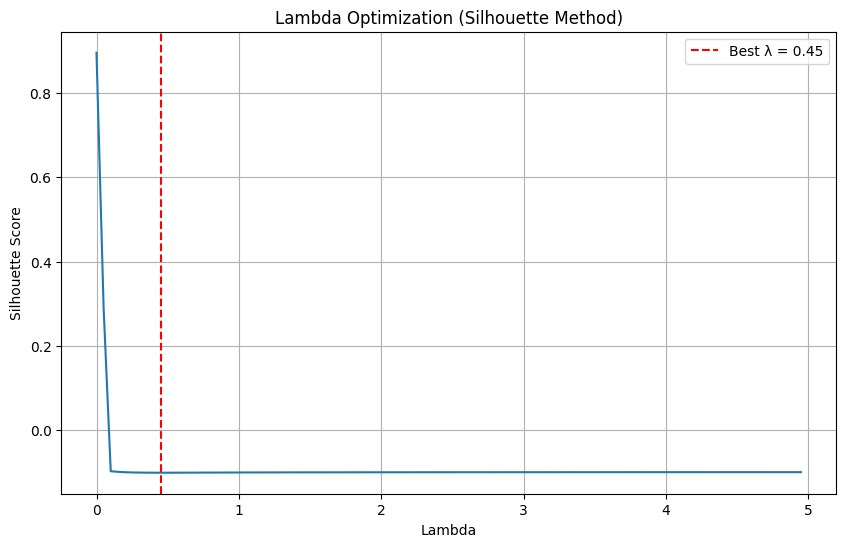

In [81]:
acpca.plot_lambda_optimization()

In [31]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.testing import assert_allclose

rng = np.random.RandomState(42)

X = rng.randn(100, 20)
n_components = 1

# Fit PCA
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(X)

# Fit ACPCA with L=0.0
acpca = ACPCA(n_components=n_components, Y=np.ones((X.shape[0], )), L=0, use_implicit=False, preprocess=True, scale_x=False, center_x=True, center_y=True)

acpca_transformed = acpca.fit_transform(X)



In [32]:
np.concatenate([pca_transformed, acpca_transformed], axis=1)

array([[-1.93545846e+00, -1.93545829e+00],
       [ 1.50786896e+00,  1.50786938e+00],
       [-8.60459287e-01, -8.60459423e-01],
       [-1.24638102e+00, -1.24638085e+00],
       [ 6.72487945e-01,  6.72487951e-01],
       [-9.65871023e-01, -9.65871149e-01],
       [-7.72989621e-02, -7.72993500e-02],
       [ 1.03085401e+00,  1.03085421e+00],
       [-1.17991273e+00, -1.17991328e+00],
       [-9.19182835e-01, -9.19182771e-01],
       [ 9.79635437e-01,  9.79635860e-01],
       [ 9.55362967e-01,  9.55362801e-01],
       [ 7.41721197e-01,  7.41721380e-01],
       [-2.38013406e+00, -2.38013355e+00],
       [ 8.53898461e-01,  8.53898113e-01],
       [ 8.92375489e-01,  8.92375283e-01],
       [-1.26369074e+00, -1.26369050e+00],
       [ 1.51336009e+00,  1.51336034e+00],
       [ 8.98775166e-01,  8.98775071e-01],
       [-8.39102479e-01, -8.39102542e-01],
       [ 3.68607450e-01,  3.68607136e-01],
       [-1.32066474e+00, -1.32066497e+00],
       [-7.07372309e-01, -7.07371911e-01],
       [-9.

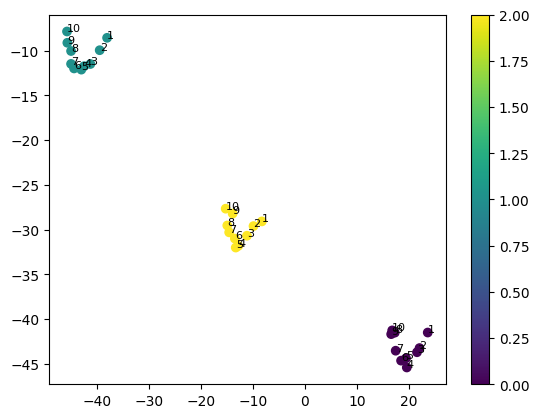

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('../data/data_example1.csv')

X = data.iloc[:, :-2].values
y = data['batch_labels'].values

acpca = ACPCA(n_components=2, Y=y, L=0.0)

X_pca = acpca.fit(X).transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# annotate each point with time
for i, txt in enumerate(data['point_annotation']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

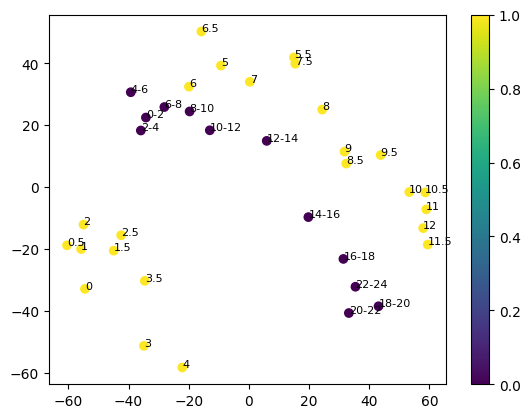

In [128]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('../data/data_fly_worm_merged.csv')

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = data.iloc[:, :-3].values
y = data['species'].map({'fly': 0, 'worm': 1}).values
y2 = data['Y'].values
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
# annotate each point with time
for i, txt in enumerate(data['time']):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

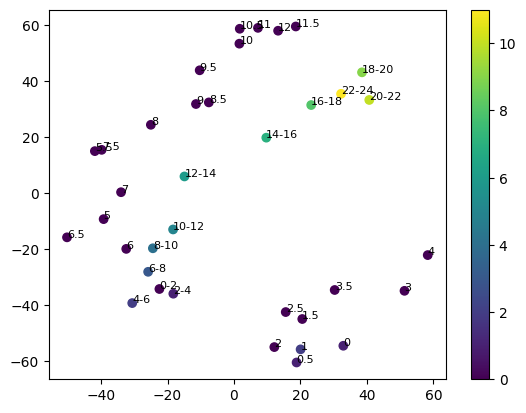

In [139]:
import sys
sys.path.append('/home/vlad/projects/acpca')
from acpca.transform import ACPCA

acpca = ACPCA(
    n_components=2, 
    Y=y, 
    L=-1, 
    lambda_method='original', 
    kernel='linear',
    gamma=0.5, 
    preprocess=True, 
    use_implicit=True, 
    scale_x=False,
    scale_y=False,
    center_x=True, 
    center_y=True, 
)

X_acpca = acpca.fit(X).transform(X)

# Plot ACPCA
plt.scatter(X_acpca[:, 0], X_acpca[:, 1], c=y2, cmap='viridis')
for i, txt in enumerate(data['time']):
    plt.annotate(txt, (X_acpca[i, 0], X_acpca[i, 1]), fontsize=8)
plt.colorbar()
plt.show()

<module 'matplotlib.pyplot' from '/home/vlad/anaconda3/envs/acpca/lib/python3.13/site-packages/matplotlib/pyplot.py'>

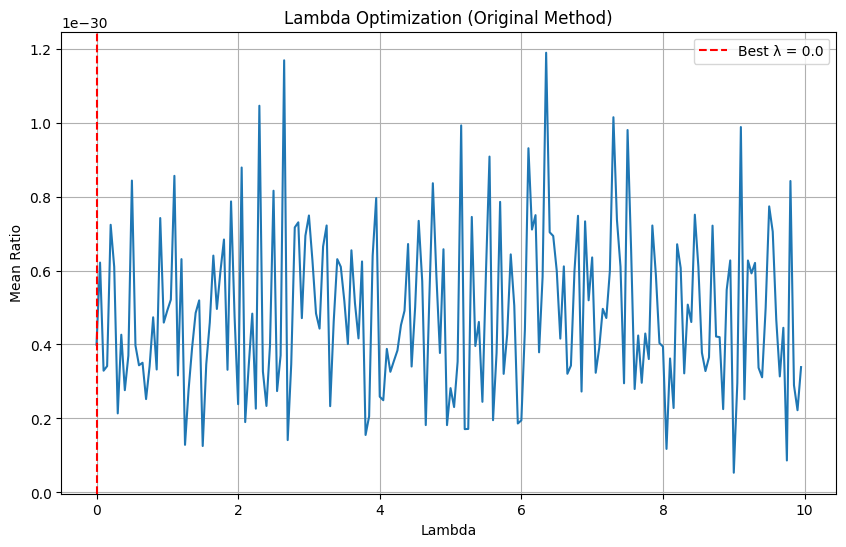

In [134]:
acpca.plot_lambda_optimization()

In [147]:
import sys
sys.path.append('/home/vlad/projects/acpca')
from acpca.transform import ACPCA
from acpca.utils import create_synthetic_data

X, X_true, Y, batch_labels = create_synthetic_data(
    n_samples=300, n_genes=100, num_batches=10, n_groups=3, random_state=42,
    apply_scale_effect=True,
    apply_dropout_effect=False, 
    apply_technical_noise=False,
    apply_batch_structure=True 
)


Batch-Group distribution:
col_0   0   1   2
row_0            
0      10  10  10
1      10  10  10
2      10  10  10
3      10  10  10
4      10  10  10
5      10  10  10
6      10  10  10
7      10  10  10
8      10  10  10
9      10  10  10

Chi-square test p-value: 1.0000
(High p-value indicates good balance between batches and groups)


<Axes: xlabel='0', ylabel='1'>

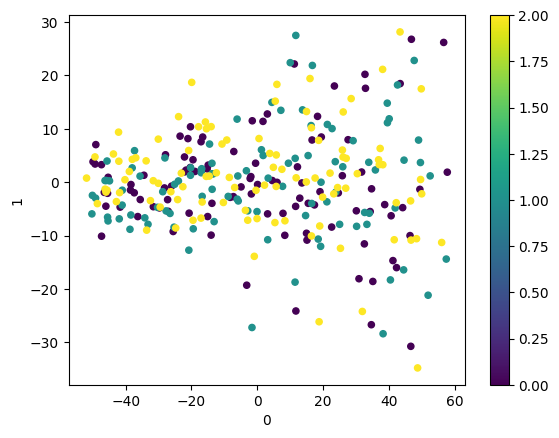

In [148]:
import pandas as pd
from sklearn.decomposition import PCA
pd.DataFrame(PCA(n_components=2).fit_transform(X)).plot.scatter(x=0, y=1, c=Y, cmap='viridis')


<Axes: xlabel='0', ylabel='1'>

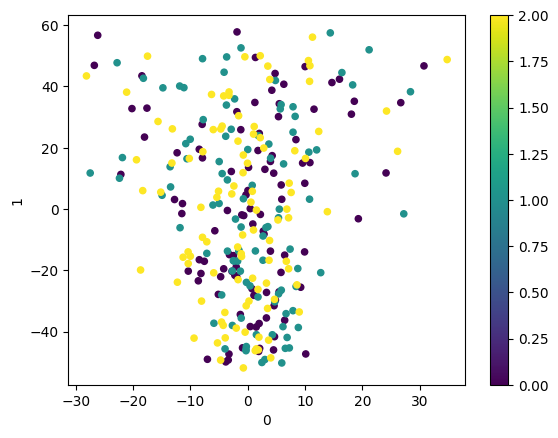

In [149]:
acpca = ACPCA(n_components=2, Y=batch_labels, L=0, preprocess=True, use_implicit=True, scale_x=False,scale_y=False, center_x=True, center_y=True, lambda_method='original', kernel='linear')
acpca_res = acpca.fit_transform(X)
df_acpca_res = pd.DataFrame(acpca_res)
df_acpca_res.plot.scatter(x=0, y=1, c=Y, cmap='viridis')


<Axes: xlabel='0', ylabel='1'>

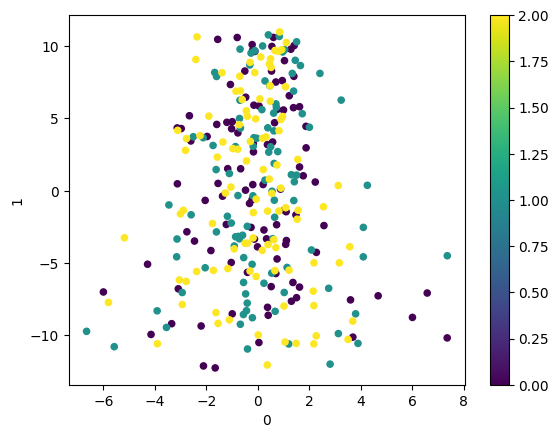

In [153]:
acpca = ACPCA(n_components=2, Y=batch_labels, L=-1, preprocess=True, use_implicit=True, scale_x=True,scale_y=True, center_x=True, center_y=True, lambda_method='original', kernel='sigmoid', gamma=0.5)
acpca_res = acpca.fit_transform(X)
df_acpca_res = pd.DataFrame(acpca_res)
df_acpca_res.plot.scatter(x=0, y=1, c=Y, cmap='viridis')


<module 'matplotlib.pyplot' from '/home/vlad/anaconda3/envs/acpca/lib/python3.13/site-packages/matplotlib/pyplot.py'>

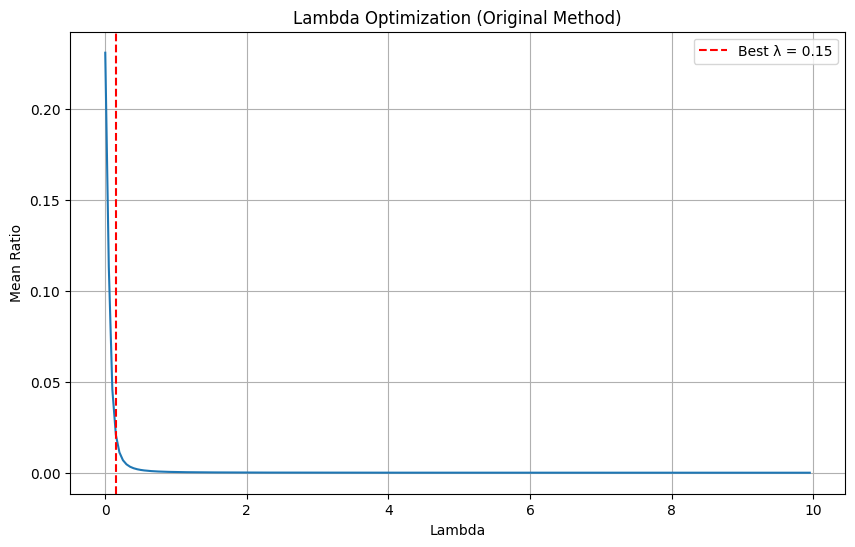

In [154]:
acpca.plot_lambda_optimization()

<Axes: xlabel='0', ylabel='1'>

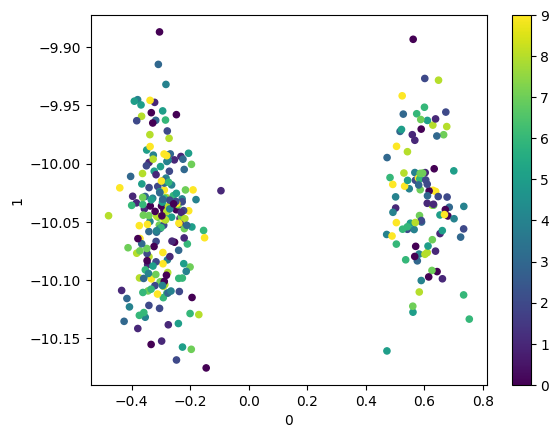

In [73]:
pd.DataFrame(ACPCA(n_components=2, Y=batch_labels, L=-1, preprocess=False, use_implicit=False, scale_x=True, center_x=True, center_y=True, lambda_method='original', kernel='linear').fit_transform(X)).plot.scatter(x=0, y=1, c=batch_labels, cmap='viridis')
